# Optimising Portfolio for Sharpe Ratio

### Set up

In [24]:
import yfinance as yf
import numpy as np

In [25]:
tickers = ['AAPL','INTC','SBUX','GC=F','CL=F', '^GSPC', '^FTSE']
df = yf.download(tickers,start= '2010-01-01')['Adj Close']

[*********************100%%**********************]  7 of 7 completed


In [26]:
df

,AAPL,CL=F,GC=F,INTC,SBUX,^FTSE,^GSPC
Date,,,,,,,
2010-01-04,6.454506,81.510002,1117.699951,13.519424,8.890199,5500.299805,1132.989990
2010-01-05,6.465664,81.769997,1118.099976,13.512957,9.098470,5522.500000,1136.520020
2010-01-06,6.362820,83.180000,1135.900024,13.467630,9.032903,5530.000000,1137.140015
2010-01-07,6.351057,82.660004,1133.099976,13.338136,9.009764,5526.700195,1141.689941
2010-01-08,6.393282,82.750000,1138.199951,13.487053,8.978909,5534.200195,1144.979980
...,...,...,...,...,...,...,...
2024-09-03,222.770004,70.339996,2489.899902,20.100000,93.180000,8298.500000,5528.930176
2024-09-04,220.850006,69.199997,2493.399902,19.430000,92.330002,8269.599609,5520.069824
2024-09-05,222.380005,69.150002,2511.399902,19.400000,91.559998,8241.700195,5503.410156


### Individual security Risk & Return 

In [27]:
ret_df = np.log((df / df.shift(1)))
ret_df.dropna()

/Users/ifechiekekwe/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,AAPL,CL=F,GC=F,INTC,SBUX,^FTSE,^GSPC
Date,,,,,,,
2010-01-05,0.001727,0.003185,0.000358,-0.000479,0.023157,0.004028,0.003111
2010-01-06,-0.016034,0.017097,0.015795,-0.003360,-0.007232,0.001357,0.000545
2010-01-07,-0.001850,-0.006271,-0.002468,-0.009662,-0.002565,-0.000597,0.003993
2010-01-08,0.006626,0.001088,0.004491,0.011103,-0.003430,0.001356,0.002878
2010-01-11,-0.008861,-0.002783,0.010922,0.005744,-0.003012,0.000704,0.001745
...,...,...,...,...,...,...,...
2024-08-29,0.014465,0.018481,0.009828,0.026172,-0.004628,0.004269,-0.000039
2024-08-30,-0.003444,-0.031583,-0.012711,0.090648,-0.003062,-0.000358,0.010042
2024-09-04,-0.008656,-0.016340,0.001405,-0.033902,-0.009164,-0.003489,-0.001604


<Axes: xlabel='Date'>

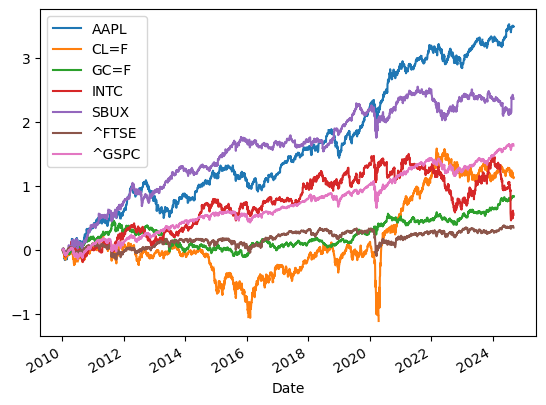

In [28]:
ret_df.cumsum().plot()

In [29]:
ret_df.mean(), ret_df.std(), ret_df.mean() / ret_df.std() 

(AAPL     0.000970
 CL=F     0.000315
 GC=F     0.000235
 INTC     0.000153
 SBUX     0.000656
 ^FTSE    0.000098
 ^GSPC    0.000453
 dtype: float64,
 AAPL     0.017665
 CL=F     0.025634
 GC=F     0.010030
 INTC     0.020309
 SBUX     0.017435
 ^FTSE    0.009944
 ^GSPC    0.010982
 dtype: float64,
 AAPL     0.054885
 CL=F     0.012282
 GC=F     0.023420
 INTC     0.007557
 SBUX     0.037601
 ^FTSE    0.009806
 ^GSPC    0.041250
 dtype: float64)

### Portfolio Risk & Retrun 

In [40]:
#scalable equal weights vector
w = np.ones(len(ret_df.columns)) / (np.ones(len(ret_df.columns))).sum()
w

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [45]:
# covariance matrix
covar_matrix = ret_df.cov()
covar_matrix

,AAPL,CL=F,GC=F,INTC,SBUX,^FTSE,^GSPC
AAPL,1.000000,0.167765,0.050579,0.458314,0.428511,0.324043,0.685955
CL=F,0.167765,1.000000,0.137637,0.172498,0.156392,0.305841,0.291959
GC=F,0.050579,0.137637,1.000000,0.040173,-0.008256,0.035413,0.048252
INTC,0.458314,0.172498,0.040173,1.000000,0.356717,0.331836,0.630229
SBUX,0.428511,0.156392,-0.008256,0.356717,1.000000,0.368100,0.638969
^FTSE,0.324043,0.305841,0.035413,0.331836,0.368100,1.000000,0.586521
^GSPC,0.685955,0.291959,0.048252,0.630229,0.638969,0.586521,1.000000


In [42]:
# Expected Returns
        #dot product fucntion method
portolio_e = ret_df.mean().dot(w)

         #expanded form to show what dot product actually is
portolio_e = (w * ret_df.mean()).sum()

# all the same 

In [ ]:
porfolio_r = (w.dot(covar_matrix.dot(w)))**0.5

In [44]:
portolio_e, porfolio_r, portolio_e / porfolio_r

(0.0004112617327733533, 0.3962223223015016, 0.0010379569994554915)